In [ ]:
#  !pip install tashaphyne
#  !pip install emoji

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import numpy as np
import nltk
import warnings as wr
import regex as re
from sklearn.model_selection import train_test_split
import emoji
import matplotlib.pyplot as plt
wr.filterwarnings("ignore")

In [2]:
data = pd.read_csv("C:\\Users\\moham\\Downloads\\combined_cleaned_data.csv")


In [3]:
data.head(-10)

,number,raw_text,spam,clean_text,num_hashtags,num_mentions,num_words,num_emojis,num_links,num_unique_emojis,num_excessive_repeated_chars
0,0,الارتفاعات المستمرة في البيتكوين تظهر قوة وثبا...,1,"['الارتفاعات', 'المستمره', 'البيتكوين', 'تظهر'...",0,0,14,0,1,0,0
1,1,مالذي دفعه لقتل شقيقه؟\r\r\nأهو المال أم الحب؟...,1,"['مالذي', 'دفعه', 'لقتل', 'شقيقه', 'اهو', 'الم...",0,0,10,0,2,0,0
2,2,صعقو أهل المنزل عندما علمو أن خادمتهم ستشتريه ...,1,"['صعقو', 'اهل', 'المنزل', 'علمو', 'خادمتهم', '...",0,0,17,0,1,0,0
3,3,اتجاه المستثمرين لشراء البيتكوين وباقي العملات...,1,"['اتجاه', 'المستثمرين', 'لشراء', 'البيتكوين', ...",0,0,16,0,1,0,0
4,4,ثابرت وعملت بذكاء حتى استطاعت هذه الخادمة الو...,1,"['ثابرت', 'وعملت', 'بذكاء', 'استطاعت', 'الخادم...",0,0,13,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
90533,90533,اللهم صل وسلم وبارك على سيدنا محمد وعلى اله وص...,0,"['الهم', 'صل', 'وسلم', 'وبارك', 'سيدنا', 'محمد...",0,0,12,1,0,1,0
90534,90534,اللهم ارحم اموات ينتظرون منا الدعاء ونور قبوره...,0,"['الهم', 'ارحم', 'اموات', 'ينتظرون', 'منا', 'ا...",1,0,17,1,0,1,0
90535,90535,دايما شغلهم بأماكن حقيقية ومافيه فوتوشوب ولو ح...,0,"['دايما', 'شغلهم', 'باماكن', 'حقيقيه', 'ومافيه...",0,0,16,0,0,0,0
90536,90536,⇟♩ღ✺ سبحآن آللہ ۈ بحمده ، عدد خلقہ ۈ رضآ نفسہ ...,0,"['⇟ღ', 'الہ', 'ۈ', 'بحمده', 'خلقہ', 'ۈ', 'رضا'...",0,0,14,2,0,2,0


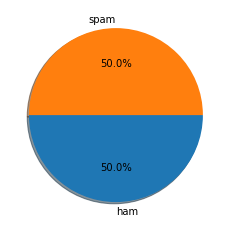

In [5]:
plt.pie(data['spam'].value_counts(), labels=['ham','spam'], counterclock=False, shadow=True, autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

In [6]:
# Remove english 
def remove_english_letters(text):
    pattern = re.compile(r"[a-zA-Z]")
    return re.sub(pattern, "", text)

def remove_english_letters_df(text):
    text['clean_text'] = text['clean_text'].apply(remove_english_letters)
    return text

In [7]:
dataCopy = data.copy()


In [8]:
dataCopy = remove_english_letters_df(dataCopy)


In [9]:
example = data['clean_text'].iloc[1689]
print(example)

['RT', '⌛قبل', 'الاف', 'فنان', 'راءع', 'قريه', 'الكهفه', 'قرب', 'حاءل', 'بنحت', 'القطعه', 'الاثريه', 'الميزه', 'لانسان', 'يضع', 'يديه', 'اسفل', 'صدره', 'يبدو', 'كا']


In [10]:
example = dataCopy['clean_text'].iloc[1689]
print(example)

['', '⌛قبل', 'الاف', 'فنان', 'راءع', 'قريه', 'الكهفه', 'قرب', 'حاءل', 'بنحت', 'القطعه', 'الاثريه', 'الميزه', 'لانسان', 'يضع', 'يديه', 'اسفل', 'صدره', 'يبدو', 'كا']


In [11]:
dataCopy['clean_text'] = dataCopy['clean_text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())


In [12]:
row = dataCopy['clean_text'].iloc[1933]
print(row)

['ê', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']


In [13]:
dataCopy['clean_text'] = dataCopy['clean_text'].apply(lambda x: re.sub(r'[^\u0600-\u06FF\s]+', '', x))


In [14]:
row = dataCopy['clean_text'].iloc[1993]
print(row)

In [15]:
dataCopy.head(9999)

,number,raw_text,spam,clean_text,num_hashtags,num_mentions,num_words,num_emojis,num_links,num_unique_emojis,num_excessive_repeated_chars
0,0,الارتفاعات المستمرة في البيتكوين تظهر قوة وثبا...,1,الارتفاعات المستمره البيتكوين تظهر وثبات العمل...,0,0,14,0,1,0,0
1,1,مالذي دفعه لقتل شقيقه؟\r\r\nأهو المال أم الحب؟...,1,مالذي دفعه لقتل شقيقه اهو المال الحب,0,0,10,0,2,0,0
2,2,صعقو أهل المنزل عندما علمو أن خادمتهم ستشتريه ...,1,صعقو اهل المنزل علمو خادمتهم ستشتريه الرغم رات...,0,0,17,0,1,0,0
3,3,اتجاه المستثمرين لشراء البيتكوين وباقي العملات...,1,اتجاه المستثمرين لشراء البيتكوين وباقي العملات...,0,0,16,0,1,0,0
4,4,ثابرت وعملت بذكاء حتى استطاعت هذه الخادمة الو...,1,ثابرت وعملت بذكاء استطاعت الخادمه الوافده شراء...,0,0,13,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9994,9994,Gorillaz-5/4\r\r\nhttps://t.co/ZZn9ssQNex,1,,0,0,2,0,1,0,0
9995,9995,الليلة مسكت على الأغاني اللي كنت أسمعها أيام م...,1,اليله مسكت الاغاني كنت اسمعها مراهقتي,0,0,15,0,1,0,0
9996,9996,I Want It That Way - Backstreet Boys (AHMIR R&...,1,,0,0,11,0,1,0,0
9997,9997,@corysbf @kyeslam https://t.co/Nfxm9yrX8s,1,,0,2,3,0,1,0,0


In [16]:
# DATA BEFORE CLEANING
empty = data[data['clean_text'].apply(lambda x: x.strip() == '')]

num_empty = len(empty)
num_spam_empty = empty['spam'].sum()  # Summing the 'class' column for spam class (1)
num_not_spam_empty = num_empty - num_spam_empty

print(f"There are {num_empty} empty or whitespace-only rows.")
print(f"Number of spam rows among empty or whitespace-only: {num_spam_empty}")
print(f"Number of not spam rows among empty or whitespace-only: {num_not_spam_empty}")


There are 0 empty or whitespace-only rows.
Number of spam rows among empty or whitespace-only: 0
Number of not spam rows among empty or whitespace-only: 0


In [17]:
# DATA AFTER CLEANING
empty = dataCopy[dataCopy['clean_text'].apply(lambda x: x.strip() == '')]

num_empty = len(empty)
num_spam_empty = empty['spam'].sum()  # Summing the 'class' column for spam class (1)
num_not_spam_empty = num_empty - num_spam_empty

print(f"There are {num_empty} empty or whitespace-only rows.")
print(f"Number of spam rows among empty or whitespace-only: {num_spam_empty}")
print(f"Number of not spam rows among empty or whitespace-only: {num_not_spam_empty}")


There are 5855 empty or whitespace-only rows.
Number of spam rows among empty or whitespace-only: 5687
Number of not spam rows among empty or whitespace-only: 168


In [18]:
dataCopy = dataCopy[dataCopy['clean_text'].apply(lambda x: x.strip() != '')]


In [19]:
dataCopy.head(7920)

,number,raw_text,spam,clean_text,num_hashtags,num_mentions,num_words,num_emojis,num_links,num_unique_emojis,num_excessive_repeated_chars
0,0,الارتفاعات المستمرة في البيتكوين تظهر قوة وثبا...,1,الارتفاعات المستمره البيتكوين تظهر وثبات العمل...,0,0,14,0,1,0,0
1,1,مالذي دفعه لقتل شقيقه؟\r\r\nأهو المال أم الحب؟...,1,مالذي دفعه لقتل شقيقه اهو المال الحب,0,0,10,0,2,0,0
2,2,صعقو أهل المنزل عندما علمو أن خادمتهم ستشتريه ...,1,صعقو اهل المنزل علمو خادمتهم ستشتريه الرغم رات...,0,0,17,0,1,0,0
3,3,اتجاه المستثمرين لشراء البيتكوين وباقي العملات...,1,اتجاه المستثمرين لشراء البيتكوين وباقي العملات...,0,0,16,0,1,0,0
4,4,ثابرت وعملت بذكاء حتى استطاعت هذه الخادمة الو...,1,ثابرت وعملت بذكاء استطاعت الخادمه الوافده شراء...,0,0,13,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9991,9991,كلمات هذي الأغنية لطيفة، تتحدث عن حبيبين قررا ...,1,كلمات الاغنيه لطيفه تحدث حبيبين قرا الانفصال ب...,0,0,13,0,1,0,0
9992,9992,@nashmi_koshaim @AaliOtb الله يخليها لكم,1,يخليها,0,2,3,0,0,0,0
9995,9995,الليلة مسكت على الأغاني اللي كنت أسمعها أيام م...,1,اليله مسكت الاغاني كنت اسمعها مراهقتي,0,0,15,0,1,0,0
9998,9998,أسرار من #يعرب https://t.co/j8ZipTjYgI,1,اسرار يعرب,1,0,3,0,1,0,0


In [20]:
dataCopy.head(9999)

,number,raw_text,spam,clean_text,num_hashtags,num_mentions,num_words,num_emojis,num_links,num_unique_emojis,num_excessive_repeated_chars
0,0,الارتفاعات المستمرة في البيتكوين تظهر قوة وثبا...,1,الارتفاعات المستمره البيتكوين تظهر وثبات العمل...,0,0,14,0,1,0,0
1,1,مالذي دفعه لقتل شقيقه؟\r\r\nأهو المال أم الحب؟...,1,مالذي دفعه لقتل شقيقه اهو المال الحب,0,0,10,0,2,0,0
2,2,صعقو أهل المنزل عندما علمو أن خادمتهم ستشتريه ...,1,صعقو اهل المنزل علمو خادمتهم ستشتريه الرغم رات...,0,0,17,0,1,0,0
3,3,اتجاه المستثمرين لشراء البيتكوين وباقي العملات...,1,اتجاه المستثمرين لشراء البيتكوين وباقي العملات...,0,0,16,0,1,0,0
4,4,ثابرت وعملت بذكاء حتى استطاعت هذه الخادمة الو...,1,ثابرت وعملت بذكاء استطاعت الخادمه الوافده شراء...,0,0,13,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
12524,12524,RT @IbrahemElfekyy: إذا نظرت للحاضر بسلبية، ول...,1,نظرت لحاضر بسلبيه ولمستقبل بتشاءم توقع حياتك ...,1,1,17,0,0,0,0
12525,12525,فَشَرَّقَ حَتّى لَيسَ لِلشَرقِ مَشرِقٌ \r\r\nو...,1,فشرق لشرق مشرق وغرب لغرب مغرب المتنبي,1,0,11,0,0,0,0
12526,12526,RT @ali_al6n6awe: ألا ترون العروق الشعرية كيف ...,1,ترون العروق الشعريه تحمل الدم اطراف الجسم تصب...,0,1,19,0,0,0,0
12527,12527,إِذَا سَاءَ فِعلُ المَرءِ سَاءَت ظُنُونُهُ\r\r...,1,فعل المرء ساءت ظنونه وصدق يعتاده توهم وعادي مح...,0,0,16,0,1,0,0


In [21]:
value_counts = dataCopy['spam'].value_counts()

count_of_zero = value_counts[0]
count_of_one = value_counts[1]

print("Count of 0:", count_of_zero)
print("Count of 1:", count_of_one)


Count of 0: 45106
Count of 1: 39587


In [22]:
# TO MAKE THE DATA BALANCED
count_difference = count_of_zero - count_of_one

data_class_0 = dataCopy[dataCopy['spam'] == 0].sample(frac=1, random_state=42)

dataCopy = pd.concat([data_class_0.iloc[:-count_difference], dataCopy[dataCopy['spam'] == 1]], ignore_index=True)



In [23]:
value_counts = dataCopy['spam'].value_counts()

count_of_zero = value_counts[0]
count_of_one = value_counts[1]

print("Count of 0:", count_of_zero)
print("Count of 1:", count_of_one)


Count of 0: 39587
Count of 1: 39587


In [24]:
dataCopy.head(5)

,number,raw_text,spam,clean_text,num_hashtags,num_mentions,num_words,num_emojis,num_links,num_unique_emojis,num_excessive_repeated_chars
0,63595,ما تمنيت البكاء يوما ولكن هذا الزمن ابكاني تمن...,0,تمنيت البكاء يوما الزمن ابكاني تمنيت اعيش تريد...,1,0,15,1,0,1,0
1,56618,إمامي .. جراح السلاسل وتلك القيود .. س تشفى .....,0,امامي جراح السلاسل القيود تشفي بطالب ثار البتو...,0,0,18,1,0,1,0
2,77612,۞ ﷽ ۞ ﴿الحمد لله الذي أحيانا بعد ما أماتنا وإل...,0,۞ ۞ الحمد احيانا اماتنا واليه النشور يارب اجعل,0,0,12,3,0,3,0
3,50177,العالمي موطن الفرسان!!؟😳 حتى بحساباتكم الرسمية...,0,العالمي موطن الفرسان بحساباتكم الرسميه تكذبون,0,0,8,2,0,2,0
4,63928,💫 تقدر تحفر بير .. وتسعد ناس كثير!! ✅ بحمد الل...,0,تقدر تحفر بير وتسعد ناس كثير بحمد وتوفيقه انجز...,0,0,19,3,0,3,0


In [25]:
all_text = ''.join(dataCopy['clean_text'])

unique_characters = set(all_text)

print(unique_characters)


{'ٛ', 'ڪ', '٤', '۩', 'ك', '٫', 'ں', 'ه', 'ٰ', 'ڼ', 'ٓ', 'ۦ', 'ح', 'ض', 'ۈ', 'ټ', '۽', 'ذ', 'ٱ', 'ٲ', '۞', 'ڕ', 'ګ', '۴', '٣', 'ۊ', '۶', 'ڤ', 'ۛ', 'ڔ', 'ت', 'ڑ', 'غ', 'ج', 'ډ', 'ٻ', 'ۄ', 'ث', 'ۅ', 'ط', '۸', 'ف', '۰', 'س', 'ڱ', '٩', 'ۤ', 'ی', '۫', 'ے', 'ٹ', 'ڴ', 'ء', 'ۖ', '٪', 'و', 'ص', 'ٜ', 'ٳ', 'ڣ', 'ھ', 'م', 'ڰ', '٢', 'ڊ', '٥', '۵', 'د', 'ڌ', '٘', 'ٺ', 'ۧ', 'ۉ', '۔', 'ق', 'ۃ', 'ۚ', 'ۜ', 'ڳ', 'ڈ', 'ر', 'ڏ', 'ظ', 'خ', '؏', 'ې', 'ن', '۾', 'ۂ', 'ک', '۲', '٭', 'ٚ', '۪', 'ۡ', 'ع', 'ٵ', '۳', 'ۿ', 'چ', 'ب', 'ي', 'ڵ', 'ڨ', 'پ', 'ا', 'ؔ', 'ش', '٠', 'ٕ', '١', 'ہ', 'ۆ', 'ړ', 'ۗ', 'ڒ', 'ز', 'ل', 'ڛ', '٨', 'ێ', 'ۓ', '٧', 'ۣ', 'ڄ', ' ', '٦', '۱', 'ژ'}


In [26]:

unwanted_chars = [ 'ۣ' '٘', 'ۡ', '۩',  'ۛ',  'ٰ',  '٠', '۲',  '۞', '۪', '٫', 'ؔ', 'ٓ', '۵',  '۱', '٩', '٣',  'ۦ',  '۰', '٪',  'ٚ', '١', 'ۗ',  'ے', 'ۚ', '٤', 'ٜ', 'ٛ', '۫',  '٨', 'ۧ', '٢', '۸', '٦', '٭', '٥',  '۳', '٧', ' ', 'ۤ', 'ۣ',  '۴', 'ۜ', '۔', 'ٕ', 'ۖ']

for char in unwanted_chars:
    dataCopy['clean_text'] = dataCopy['clean_text'].str.replace(char, ' ')




In [27]:
value_counts = dataCopy['spam'].value_counts()

count_of_zero = value_counts[0]
count_of_one = value_counts[1]

print("Count of 0:", count_of_zero)
print("Count of 1:", count_of_one)


Count of 0: 39587
Count of 1: 39587


In [28]:
dataCopy.head(5)

,number,raw_text,spam,clean_text,num_hashtags,num_mentions,num_words,num_emojis,num_links,num_unique_emojis,num_excessive_repeated_chars
0,63595,ما تمنيت البكاء يوما ولكن هذا الزمن ابكاني تمن...,0,تمنيت البكاء يوما الزمن ابكاني تمنيت اعيش تريد...,1,0,15,1,0,1,0
1,56618,إمامي .. جراح السلاسل وتلك القيود .. س تشفى .....,0,امامي جراح السلاسل القيود تشفي بطالب ثار البتو...,0,0,18,1,0,1,0
2,77612,۞ ﷽ ۞ ﴿الحمد لله الذي أحيانا بعد ما أماتنا وإل...,0,الحمد احيانا اماتنا واليه النشور يارب اجعل,0,0,12,3,0,3,0
3,50177,العالمي موطن الفرسان!!؟😳 حتى بحساباتكم الرسمية...,0,العالمي موطن الفرسان بحساباتكم الرسميه تكذبون,0,0,8,2,0,2,0
4,63928,💫 تقدر تحفر بير .. وتسعد ناس كثير!! ✅ بحمد الل...,0,تقدر تحفر بير وتسعد ناس كثير بحمد وتوفيقه انجز...,0,0,19,3,0,3,0


In [30]:
def tokenization(x,idx): # take data copy
        tokens = nltk.word_tokenize(x['clean_text'][idx])
        return tokens
    
def stemming(x):
    st = nltk.ISRIStemmer()
    stemming_root =[st.stem(token) for token in x]
    return stemming_root    

In [32]:
dataCopy['puretext'] = 0 

for i in range(0,dataCopy.shape[0]):
    tokens = tokenization(dataCopy , i )  
    pure_tokens = stemming(tokens)
    dataCopy['puretext'][i] = ' '.join(pure_tokens)



In [33]:
dataCopy.head(5)

,number,raw_text,spam,clean_text,num_hashtags,num_mentions,num_words,num_emojis,num_links,num_unique_emojis,num_excessive_repeated_chars,puretext
0,63595,ما تمنيت البكاء يوما ولكن هذا الزمن ابكاني تمن...,0,تمنيت البكاء يوما الزمن ابكاني تمنيت اعيش تريد...,1,0,15,1,0,1,0,منت بكء يوم زمن ابك منت اعش ترد نفس عشت نفس ير...
1,56618,إمامي .. جراح السلاسل وتلك القيود .. س تشفى .....,0,امامي جراح السلاسل القيود تشفي بطالب ثار البتو...,0,0,18,1,0,1,0,ممي جرح لسل قيد تشف طلب ثار بتل سلم عذب قعر سجن
2,77612,۞ ﷽ ۞ ﴿الحمد لله الذي أحيانا بعد ما أماتنا وإل...,0,الحمد احيانا اماتنا واليه النشور يارب اجعل,0,0,12,3,0,3,0,حمد احا امت ولي نشر يرب جعل
3,50177,العالمي موطن الفرسان!!؟😳 حتى بحساباتكم الرسمية...,0,العالمي موطن الفرسان بحساباتكم الرسميه تكذبون,0,0,8,2,0,2,0,علم وطن فرس حسب رسم كذب
4,63928,💫 تقدر تحفر بير .. وتسعد ناس كثير!! ✅ بحمد الل...,0,تقدر تحفر بير وتسعد ناس كثير بحمد وتوفيقه انجز...,0,0,19,3,0,3,0,قدر حفر بير سعد ناس كثر حمد وفق نجز حفر بءر لع...


In [34]:
dataCopy['tokenized_text'] = dataCopy['puretext'].apply(nltk.word_tokenize)


In [35]:
dataCopy.head(5)

,number,raw_text,spam,clean_text,num_hashtags,num_mentions,num_words,num_emojis,num_links,num_unique_emojis,num_excessive_repeated_chars,puretext,tokenized_text
0,63595,ما تمنيت البكاء يوما ولكن هذا الزمن ابكاني تمن...,0,تمنيت البكاء يوما الزمن ابكاني تمنيت اعيش تريد...,1,0,15,1,0,1,0,منت بكء يوم زمن ابك منت اعش ترد نفس عشت نفس ير...,"[منت, بكء, يوم, زمن, ابك, منت, اعش, ترد, نفس, ..."
1,56618,إمامي .. جراح السلاسل وتلك القيود .. س تشفى .....,0,امامي جراح السلاسل القيود تشفي بطالب ثار البتو...,0,0,18,1,0,1,0,ممي جرح لسل قيد تشف طلب ثار بتل سلم عذب قعر سجن,"[ممي, جرح, لسل, قيد, تشف, طلب, ثار, بتل, سلم, ..."
2,77612,۞ ﷽ ۞ ﴿الحمد لله الذي أحيانا بعد ما أماتنا وإل...,0,الحمد احيانا اماتنا واليه النشور يارب اجعل,0,0,12,3,0,3,0,حمد احا امت ولي نشر يرب جعل,"[حمد, احا, امت, ولي, نشر, يرب, جعل]"
3,50177,العالمي موطن الفرسان!!؟😳 حتى بحساباتكم الرسمية...,0,العالمي موطن الفرسان بحساباتكم الرسميه تكذبون,0,0,8,2,0,2,0,علم وطن فرس حسب رسم كذب,"[علم, وطن, فرس, حسب, رسم, كذب]"
4,63928,💫 تقدر تحفر بير .. وتسعد ناس كثير!! ✅ بحمد الل...,0,تقدر تحفر بير وتسعد ناس كثير بحمد وتوفيقه انجز...,0,0,19,3,0,3,0,قدر حفر بير سعد ناس كثر حمد وفق نجز حفر بءر لع...,"[قدر, حفر, بير, سعد, ناس, كثر, حمد, وفق, نجز, ..."


# ML for SVM

In [36]:
X_text = dataCopy['tokenized_text']
X_other_features = dataCopy.drop(columns=['raw_text', 'spam', 'clean_text', 'tokenized_text','puretext','number'])  
y = dataCopy['spam']


In [37]:
X_other_features

,num_hashtags,num_mentions,num_words,num_emojis,num_links,num_unique_emojis,num_excessive_repeated_chars
0,1,0,15,1,0,1,0
1,0,0,18,1,0,1,0
2,0,0,12,3,0,3,0
3,0,0,8,2,0,2,0
4,0,0,19,3,0,3,0
...,...,...,...,...,...,...,...
79169,1,0,15,0,0,0,0
79170,1,0,14,0,0,0,0
79171,0,1,9,0,0,0,0
79172,0,1,5,0,0,0,0


In [38]:
# Convert non-string elements to strings
X_text = [str(text) for text in X_text]

# Remove missing values if any
X_text = [text for text in X_text if pd.notnull(text)]


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_text_tfidf = tfidf_vectorizer.fit_transform(X_text)


In [40]:
# Feature Scaling for other numerical features
scaler = StandardScaler()
X_other_features_scaled = scaler.fit_transform(X_other_features)


In [41]:
# Combine text and other features

import scipy.sparse as sp
X_combined = sp.hstack((X_text_tfidf, X_other_features_scaled), format='csr')


In [42]:
#Split Data

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


In [43]:
# Train
svm_clf = SVC(kernel='linear', C=1.0, random_state=42)  
svm_clf.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [44]:
training_accuracy = svm_clf.score(X_train, y_train)
print("Training Accuracy:", training_accuracy)


Training Accuracy: 0.9757021740160091


In [45]:
y_pred = svm_clf.predict(X_test)


In [46]:
testing_accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", testing_accuracy)


Testing Accuracy: 0.9612882854436375


In [47]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[7771  150]
 [ 463 7451]]


In [48]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7921
           1       0.98      0.94      0.96      7914

    accuracy                           0.96     15835
   macro avg       0.96      0.96      0.96     15835
weighted avg       0.96      0.96      0.96     15835



In [49]:
joblib.dump(svm_clf, 'SVmModel.pkl')

['SVmModel.pkl']

# ML for LR

In [50]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=42) 

In [51]:
lr_clf.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [52]:
training_accuracy = lr_clf.score(X_train, y_train)
print("Training Accuracy:", training_accuracy)


Training Accuracy: 0.9642716178026176


In [53]:
y_pred = lr_clf.predict(X_test)


In [54]:
testing_accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", testing_accuracy)


Testing Accuracy: 0.9545311019892643


In [55]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[7833   88]
 [ 632 7282]]


In [56]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7921
           1       0.99      0.92      0.95      7914

    accuracy                           0.95     15835
   macro avg       0.96      0.95      0.95     15835
weighted avg       0.96      0.95      0.95     15835



In [57]:
joblib.dump(lr_clf, 'lrModel.pkl')

['lrModel.pkl']

# ML for DT

In [58]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42) 
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [59]:
training_accuracy = dt_clf.score(X_train, y_train)
print("Training Accuracy:", training_accuracy)


Training Accuracy: 0.999857907450386


In [60]:
y_pred = dt_clf.predict(X_test)


In [61]:
testing_accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", testing_accuracy)


Testing Accuracy: 0.9583201768234922


In [62]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[7579  342]
 [ 318 7596]]


In [63]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7921
           1       0.96      0.96      0.96      7914

    accuracy                           0.96     15835
   macro avg       0.96      0.96      0.96     15835
weighted avg       0.96      0.96      0.96     15835



In [64]:
joblib.dump(dt_clf, 'dt_model.pkl')

['dt_model.pkl']

In [65]:
models = [dt_clf, lr_clf, svm_clf]
model_names = ['Decision Tree', 'Logistic Regression', 'SVM']

train_acc = []
test_acc = []

for model in models:
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    train_acc.append(accuracy_score(y_train, train_predictions))
    test_acc.append(accuracy_score(y_test, test_predictions))


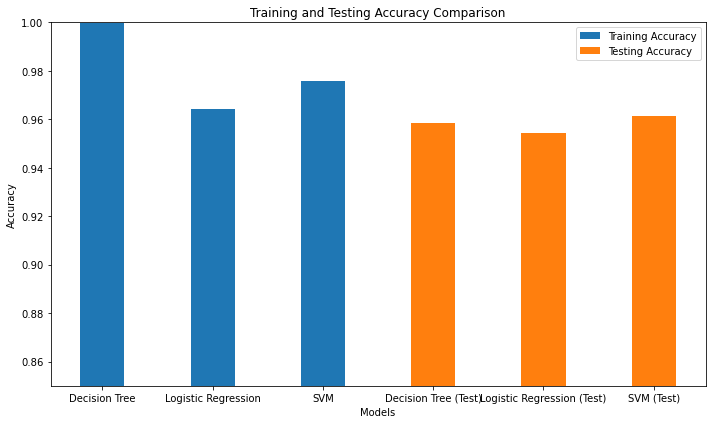

In [66]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, train_acc, width=0.4, label='Training Accuracy')
plt.bar([name + " (Test)" for name in model_names], test_acc, width=0.4, label='Testing Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy Comparison')
plt.legend()
plt.ylim(0.85, 1.0)  
plt.tight_layout()
plt.show()


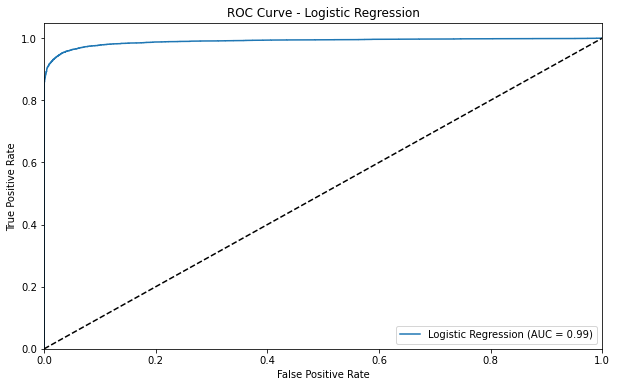

In [67]:
from sklearn.metrics import roc_curve, auc


y_score_lr = lr_clf.predict_proba(X_test)[:, 1] 
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


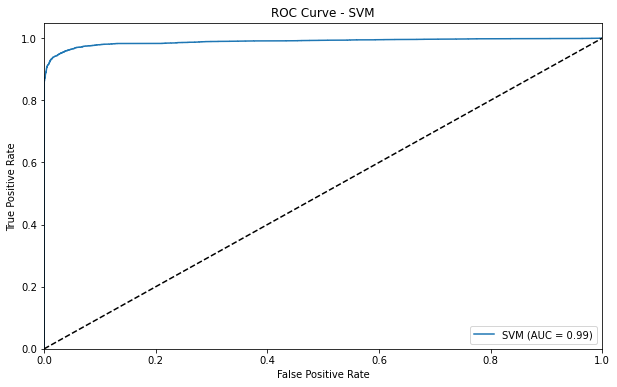

In [68]:

y_score_svm = svm_clf.decision_function(X_test) 
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc="lower right")
plt.show()


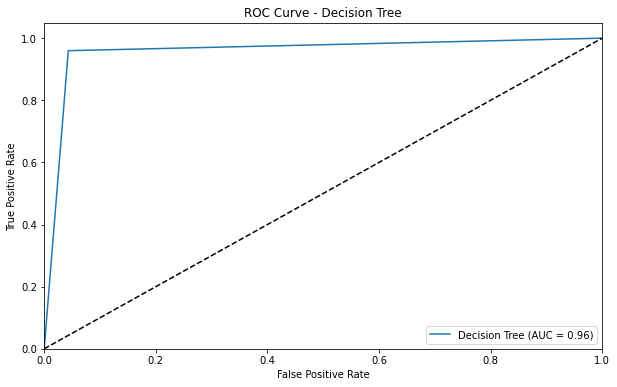

In [69]:
y_score_dt = dt_clf.predict_proba(X_test)[:, 1] 
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()



In [100]:
dataCopy

,number,raw_text,spam,clean_text,num_hashtags,num_mentions,num_words,num_emojis,num_links,num_unique_emojis,num_excessive_repeated_chars,puretext,tokenized_text
0,63595,ما تمنيت البكاء يوما ولكن هذا الزمن ابكاني تمن...,0,تمنيت البكاء يوما الزمن ابكاني تمنيت اعيش تريد...,1,0,15,1,0,1,0,منت بكء يوم زمن ابك منت اعش ترد نفس عشت نفس ير...,"[منت, بكء, يوم, زمن, ابك, منت, اعش, ترد, نفس, ..."
1,56618,إمامي .. جراح السلاسل وتلك القيود .. س تشفى .....,0,امامي جراح السلاسل القيود تشفي بطالب ثار البتو...,0,0,18,1,0,1,0,ممي جرح لسل قيد تشف طلب ثار بتل سلم عذب قعر سجن,"[ممي, جرح, لسل, قيد, تشف, طلب, ثار, بتل, سلم, ..."
2,77612,۞ ﷽ ۞ ﴿الحمد لله الذي أحيانا بعد ما أماتنا وإل...,0,الحمد احيانا اماتنا واليه النشور يارب اجعل,0,0,12,3,0,3,0,حمد احا امت ولي نشر يرب جعل,"[حمد, احا, امت, ولي, نشر, يرب, جعل]"
3,50177,العالمي موطن الفرسان!!؟😳 حتى بحساباتكم الرسمية...,0,العالمي موطن الفرسان بحساباتكم الرسميه تكذبون,0,0,8,2,0,2,0,علم وطن فرس حسب رسم كذب,"[علم, وطن, فرس, حسب, رسم, كذب]"
4,63928,💫 تقدر تحفر بير .. وتسعد ناس كثير!! ✅ بحمد الل...,0,تقدر تحفر بير وتسعد ناس كثير بحمد وتوفيقه انجز...,0,0,19,3,0,3,0,قدر حفر بير سعد ناس كثر حمد وفق نجز حفر بءر لع...,"[قدر, حفر, بير, سعد, ناس, كثر, حمد, وفق, نجز, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79169,45269,#عويض_مطير_العطوي_في_ذمه_الله. اللهم ارحمه رحم...,1,عويض مطير العطوي ذمه اله الهم ارحمه رحمه واسعه...,1,0,15,0,0,0,0,عوض طير عطي ذمه اله لهم رحم رحم وسع وسك فسح جن...,"[عوض, طير, عطي, ذمه, اله, لهم, رحم, رحم, وسع, ..."
79170,45270,#رحمك_الله_يا_حجاب_بن_نحيت الله يرحمه شيخ قبيل...,1,رحمك اله حجاب نحيت يرحمه شيخ قبيله ورجل ملتزم ...,1,0,14,0,0,0,0,رحم اله حجب نحت رحم شيخ قبل رجل لزم حسب وله حس...,"[رحم, اله, حجب, نحت, رحم, شيخ, قبل, رجل, لزم, ..."
79171,45271,@zar4466 على كل حال المراه هي الدنيا والمال ول...,1,حال المراه الدنيا والمال يفتح امور الدنيا,0,1,9,0,0,0,0,حال راه دنا مال فتح امر دنا,"[حال, راه, دنا, مال, فتح, امر, دنا]"
79172,45272,@zar4466 اذا لم تحرم عليك نهائيا اعتقد انك راح...,1,تحرم نهاءيا اعتقد تراجعها,0,1,5,0,0,0,0,حرم نهء عقد رجع,"[حرم, نهء, عقد, رجع]"


In [70]:
dataCopy.to_csv("NewCleanedData.csv")
